In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as dtc # 树算法
from sklearn.tree import plot_tree # 树图
%matplotlib inline

In [2]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_theme(font='Times New Roman', font_scale=1.2)
plt.rc("figure", autolayout=True)
# Chinese support
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('dataset.csv')
df

,weather,temperature,humidity,wind,sports
0,晴,85,85,无,不适合
1,晴,80,90,有,不适合
2,多云,83,78,无,适合
3,有雨,70,96,无,适合
4,有雨,68,80,无,适合
5,有雨,65,70,有,不适合
6,多云,64,65,有,适合
7,晴,72,95,无,不适合
8,晴,69,70,无,适合
9,有雨,75,80,无,适合


In [4]:
for i in df['weather'].values:
    if i == '晴':
        df['weather'].replace(i, 0, inplace=True)
    elif i == '多云':
        df['weather'].replace(i, 1, inplace=True)
    elif i == '有雨':
        df['weather'].replace(i, 2, inplace=True)

for i in df['wind'].values:
    if i  == '无':
        df['wind'].replace(i, 0, inplace=True)
    elif i == '有':
        df['wind'].replace(i, 1, inplace=True)
        
for i in df['sports'].values:
    if i == '不适合':
        df['sports'].replace(i, 'no', inplace=True)
    elif i == '适合':
        df['sports'].replace(i, 'yes', inplace=True)

df

,weather,temperature,humidity,wind,sports
0,0,85,85,0,no
1,0,80,90,1,no
2,1,83,78,0,yes
3,2,70,96,0,yes
4,2,68,80,0,yes
5,2,65,70,1,no
6,1,64,65,1,yes
7,0,72,95,0,no
8,0,69,70,0,yes
9,2,75,80,0,yes


In [5]:
X_var = df[['weather', 'temperature', 'humidity', 'wind']].values # 自变量
y_var = df['sports'].values # 因变量

In [6]:
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_var, y_var)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

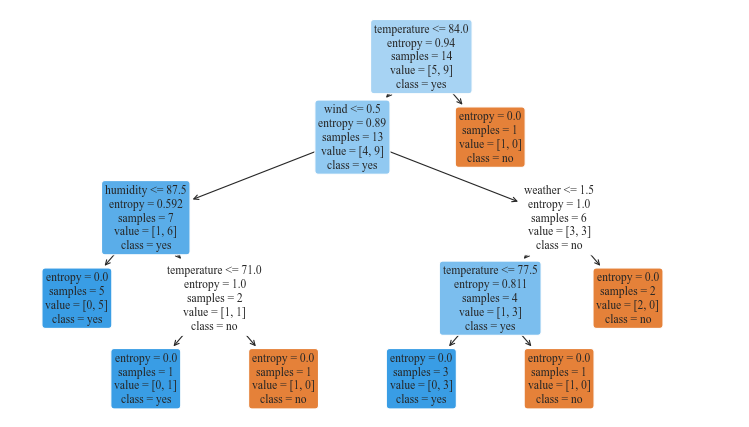

In [7]:
feature_names = df.columns[:4].tolist()
target_names = df['sports'].unique().tolist()

plt.figure(figsize=(10, 6), dpi=80)
plot_tree(model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True)

#plt.savefig('tree_result.pdf') 
plt.show()